In [167]:
import numpy as np
import pandas as pd
from time import time
import warnings
warnings.filterwarnings(action="ignore", category=DeprecationWarning)

In [168]:
FIRST_SIZE = 4
LAST_SIZE = 1024
STEP_SIZE = 10

COUNT_TRIES = 5

MAX_DEF_COUNT_ITER = 100000
"""Максимальное количество итераций по-умолчанию"""
DEF_EPS = 0.0001
"""Точность по-умолчанию"""

'Точность по-умолчанию'

In [169]:
(LAST_SIZE - FIRST_SIZE + 1), (LAST_SIZE - FIRST_SIZE + 1) / STEP_SIZE, ((LAST_SIZE - FIRST_SIZE) // STEP_SIZE + 1)

(1021, 102.1, 103)

In [170]:
df = pd.DataFrame(
    columns=[
        "size",
        "true_value_max",
        "true_value_min",
        "value_max",
        "value_max_time",
        "value_min_def",
        "value_min_def_time",
        "value_min_rel",
        "value_min_rel_time"
    ],
    index=range(1, ((LAST_SIZE - FIRST_SIZE) // STEP_SIZE + 1) * COUNT_TRIES + 1),
)
df

,size,true_value_max,true_value_min,value_max,value_max_time,value_min_def,value_min_def_time,value_min_rel,value_min_rel_time
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Подготовка

In [171]:
def calc(A: np.matrix, b: np.matrix) -> np.matrix:
    if b is None:
        print("Вектор собственного значения не был посчитан")
        return None
    return float((b.T @ A @ b) / (b.T @ b))

# Прямой метод

$x^{(k)} = \dfrac{Ax^{(k - 1)}}{\alpha_{k - 1}}$

$\lambda_{1}(A) = \dfrac{\left( Ax^{(k)}, x^{(k)} \right)}{(x^{(k)}, x^{(k)})} = \dfrac{(x^{(k)})^{T}A^{(k)}x^{(k)}}{(x^{(k)})^{T}x^{(k)}}$, где $|\lambda_1(A)|$ - наибольшее по модулю СЗ

In [172]:
def power_iteration(
    A: np.matrix,
    epsilon: float = DEF_EPS,
    num_iterations=MAX_DEF_COUNT_ITER,
    b_k: np.matrix = None,
) -> np.matrix:
    if b_k is None:
        b_k = np.random.rand(A.shape[1], 1)
    # print("Начальное приближение:", b_k, sep="\n")

    alpha_old = None

    # for _ in range(num_iterations):
    while True:
        b_k1 = np.dot(A, b_k)

        b_k1_norm = np.linalg.norm(b_k1)

        b_k = b_k1 / b_k1_norm

        alpha_new = calc(A, b_k)
        if alpha_old is not None and abs(alpha_new - alpha_old) < epsilon:
            break
        alpha_old = alpha_new

    return b_k, alpha_new

# Обратный метод

## Стандартная версия

In [173]:
def inverse_power_def(
    A: np.matrix,
    epsilon: float = DEF_EPS,
    num_iterations=MAX_DEF_COUNT_ITER,
    b_k: np.matrix = None,
) -> np.matrix:
    try:
        inv_A = np.linalg.inv(A)
    except np.linalg.LinAlgError:
        print("Вырожденная матрица")
        return None
    # print("Обратная матрица:",inv_A, sep="\n")
    res = power_iteration(
        A = inv_A, epsilon=epsilon, num_iterations=num_iterations, b_k=b_k
    )
    return res[0], 1 / res[1]

In [174]:
# A: np.matrix = np.matrix("1 3 -2 0;"
#                          "1 1 4 7;"
#                          "4 7 11 23;"
#                          "52 66 2 0")  # -0.65
# calc(A, inverse_power_def(A))

## Модификация Релэя

In [175]:
def inverse_power_rel(A, epsilon = DEF_EPS, mu = None, b_k = None):
  if b_k is None:
      b_k = np.random.rand(A.shape[1], 1) # Попробовать близкий к настоящему собственный вектор
      
  if mu is None:
    mu = np.random.randint(1, 1000) / 100
#   print("R:\n", mu, " ", b_k, "\n")
  
  b_k = b_k / np.linalg.norm(b_k)
  try:
    y = np.linalg.solve(A - mu * np.eye(A.shape[0]), b_k)
  except np.linalg.LinAlgError:
        print("Вырожденная матрица")
        return None, None
  # print(y)
  np.random.randint
  # print(x)
  lambda_ = float(np.dot(y.T, b_k))
  # print(lambda_, lambda_ * x)
  mu = mu + 1 / lambda_
  err = np.linalg.norm(y - lambda_ * b_k) / np.linalg.norm(y)

  while err > epsilon:
    b_k = y / np.linalg.norm(y)
    y = np.linalg.solve(A - mu * np.eye(A.shape[0]), b_k)
    lambda_ = float(np.dot(y.T, b_k))
    mu = mu + 1 / lambda_
    err = np.linalg.norm(y - lambda_ * b_k) / np.linalg.norm(y)

  return b_k, float(mu)

In [176]:
A: np.matrix = np.matrix("1 -2 -1;"
                         "-1 1 1;"
                         "1 0 -1")  # 0, 2, -1
# Сильно зависит от начального приближения
# Не вижу в ней смысла
inverse_power_rel(A)[1]
# calc(A, inverse_power_rel(A)[0])

7.896643789132485e-10

# Вычисление

In [177]:
def output(
    A: np.matrix,
    texts: list[str],
    funcs: list,
    num_iterrations: int = MAX_DEF_COUNT_ITER,
    b_k: np.matrix = None,
    mu: float = None,
) -> tuple[np.matrix, list[float | None]]:

    eigs = np.linalg.eigvals(A)
    # print(type(eigs[0]))
    if any(isinstance(eig, np.complex128) for eig in eigs):
        print(eigs)

    abs_v = np.abs(np.linalg.eigvals(A))

    abs_v_max = np.max(abs_v)

    abs_v_min = np.min(abs_v)
    # print(

    #     "Собственные значения матрицы A",

    #     f"Максимальное: {abs_v_max}",
    #     f"Минимальное: {abs_v_min}",
    #     sep="\n",
    # )

    # print("========")

    mass_eval = []

    for text, f in zip(texts, funcs):
        start_time = time()
        # print(text)
        if f.__name__ != inverse_power_rel.__name__:
            evec, eval = f(A=A, num_iterations=num_iterrations, b_k=b_k)
            # evec = f(A=A, num_iterations=num_iterrations, b_k=b_k)
            # eval = calc(A, evec)
        else:
            evec, eval = f(A=A, b_k=b_k, mu=mu)
        stop_time = time()
        # print("========")
        mass_eval.append(abs(eval))
        mass_eval.append(stop_time - start_time)

    # print(text_1)

    # first_evec = f_1(A=A, num_iterations=num_iterrations, b_k=b_k)

    # first_eval = calc(A, first_evec)
    # print("========")

    # print(text_2)

    # if f_2.__name__ != inverse_power_rel.__name__:

    #     second_evec = f_2(A=A, num_iterations=num_iterrations, b_k=b_k)

    #     second_eval = calc(A, second_evec)

    # else:

    #     second_evec, second_eval = f_2(A=A, b_k=b_k, mu=mu)
    # print("========")

    # print(

    #     "Собственные векторы:",

    #     f"{text_1}:",
    #     first_evec,

    #     f"{text_2}:",

    #     second_evec,

    #     sep="\n",
    # )
    # print(

    #     "Собственные значения:",

    #     f"{text_1}: {first_eval}",

    #     f"{text_2}: {second_eval}",

    #     sep="\n",
    # )

    return A.shape[0], abs_v_max, abs_v_min, *mass_eval

In [178]:
def generate_non_singular(n):
    while True:
        # Генерируем случайную матрицу n x n
        matrix = np.random.rand(n, n)  # Вы можете использовать np.random.randint для целых чисел.
        if np.linalg.det(matrix) != 0:  # Проверяем, что определитель не равен нулю
            return matrix

In [ ]:
import numpy as np
texts = ["Прямые итерации", "Обратные итерации (обычные)", "Обратные итерации (Релэя)"]
funcs = [power_iteration, inverse_power_def, inverse_power_rel]
# texts = ["Прямые итерации", "Обратные итерации (обычные)"]
# funcs = [power_iteration, inverse_power_def]
mass = []

for i in range(FIRST_SIZE, LAST_SIZE + 1, STEP_SIZE):
    print(f"Current size:{i}")
    for j in range(COUNT_TRIES):
        print(j + 1)
        matr = generate_non_singular(i)
        matr = matr @ matr.T
        # TODO: Комплексные корни???
        # В вычислениях проверять на комплексные корни
        df.iloc[((i - FIRST_SIZE) // STEP_SIZE) * COUNT_TRIES + j] = output(matr, texts, funcs)
    print()

df["delta_max"] = abs(df["true_value_max"] - df["value_max"])
df["delta_min_def"] = abs(df["true_value_min"] - df["value_min_def"])
df["delta_min_rel"] = abs(df["true_value_min"] - df["value_min_rel"])

df

Current size:4
1
2
3
4
5

Current size:14
1
2
3
4
5

Current size:24
1
2
3
4
5

Current size:34
1
2
3
4
5

Current size:44
1
2
3
4
5

Current size:54
1
2
3
4
5

Current size:64
1
2
3
4
5

Current size:74
1
2
3
4
5

Current size:84
1
2
3
4
5

Current size:94
1
2
3
4
5

Current size:104
1
2
3
4
5

Current size:114
1
2
3
4
5

Current size:124
1
2
3
4
5

Current size:134
1
2
3
4
5

Current size:144
1
2
3
4
5

Current size:154
1
2
3
4
5

Current size:164
1
2
3
4
5

Current size:174
1
2
3
4
5

Current size:184
1
2
3
4
5

Current size:194
1
2
3
4
5

Current size:204
1
2
3
4
5

Current size:214
1
2
3
4
5

Current size:224
1
2
3
4
5

Current size:234
1
2
3
4
5

Current size:244
1
2
3
4
5

Current size:254
1
2
3
4
5

Current size:264
1
2
3
4
5

Current size:274
1
2
3
4
5

Current size:284
1
2
3
4
5

Current size:294
1
2
3
4
5

Current size:304
1
2
3
4
5

Current size:314
1
2
3
4
5

Current size:324
1
2
3
4
5

Current size:334
1
2
3
4
5

Current size:344
1
2
3
4
5

Current size:354
1
2
3
4
5

Cur

,size,true_value_max,true_value_min,value_max,value_max_time,value_min_def,value_min_def_time,value_min_rel,value_min_rel_time,delta_max,delta_min_def,delta_min_rel
1,4,6.170139,0.000734,6.170139,0.0,0.000734,0.0,6.170139,0.0,0.0,0.0,6.169405
2,4,5.131875,0.018083,5.131875,0.0,0.018083,0.0,5.131875,0.0,0.0,0.0,5.113792
3,4,5.392997,0.12195,5.392996,0.001004,0.121955,0.0,5.392997,0.0,0.000002,0.000004,5.271047
4,4,3.861547,0.004939,3.861547,0.0,0.004939,0.0,3.861547,0.0,0.0,0.0,3.856608
5,4,4.330139,0.236009,4.330138,0.0,0.236013,0.0,4.330139,0.0,0.000001,0.000003,4.09413
...,...,...,...,...,...,...,...,...,...,...,...,...
511,1024,262538.962541,0.0,262538.962541,0.002001,0.0,0.045603,9.823671,0.158906,0.0,0.0,9.823671
512,1024,262667.69391,0.000022,262667.69391,0.001001,0.000022,0.046644,9.848482,0.19192,0.0,0.0,9.84846
513,1024,262286.602719,0.000001,262286.602719,0.002099,0.000001,0.048132,3.720432,0.287634,0.0,0.0,3.72043
514,1024,262282.995531,0.000083,262282.995531,0.001541,0.000083,0.046609,9.195845,0.224218,0.0,0.0,9.195762


In [180]:
df

,size,true_value_max,true_value_min,value_max,value_max_time,value_min_def,value_min_def_time,value_min_rel,value_min_rel_time,delta_max,delta_min_def,delta_min_rel
1,4,6.170139,0.000734,6.170139,0.0,0.000734,0.0,6.170139,0.0,0.0,0.0,6.169405
2,4,5.131875,0.018083,5.131875,0.0,0.018083,0.0,5.131875,0.0,0.0,0.0,5.113792
3,4,5.392997,0.12195,5.392996,0.001004,0.121955,0.0,5.392997,0.0,0.000002,0.000004,5.271047
4,4,3.861547,0.004939,3.861547,0.0,0.004939,0.0,3.861547,0.0,0.0,0.0,3.856608
5,4,4.330139,0.236009,4.330138,0.0,0.236013,0.0,4.330139,0.0,0.000001,0.000003,4.09413
...,...,...,...,...,...,...,...,...,...,...,...,...
511,1024,262538.962541,0.0,262538.962541,0.002001,0.0,0.045603,9.823671,0.158906,0.0,0.0,9.823671
512,1024,262667.69391,0.000022,262667.69391,0.001001,0.000022,0.046644,9.848482,0.19192,0.0,0.0,9.84846
513,1024,262286.602719,0.000001,262286.602719,0.002099,0.000001,0.048132,3.720432,0.287634,0.0,0.0,3.72043
514,1024,262282.995531,0.000083,262282.995531,0.001541,0.000083,0.046609,9.195845,0.224218,0.0,0.0,9.195762


In [181]:
df.sort_values("delta_max", ascending=False).head(10)

,size,true_value_max,true_value_min,value_max,value_max_time,value_min_def,value_min_def_time,value_min_rel,value_min_rel_time,delta_max,delta_min_def,delta_min_rel
3,4,5.392997,0.12195,5.392996,0.001004,0.121955,0.0,5.392997,0.0,0.000002,0.000004,5.271047
5,4,4.330139,0.236009,4.330138,0.0,0.236013,0.0,4.330139,0.0,0.000001,0.000003,4.09413
10,14,47.981309,0.003481,47.981308,0.0,0.003481,0.0,0.130233,0.0,0.0,0.0,0.126752
7,14,46.616548,0.013763,46.616548,0.0,0.013763,0.0,0.523577,0.0,0.0,0.0,0.509814
15,24,140.60791,0.000161,140.60791,0.0,0.000161,0.0,7.575105,0.0,0.0,0.0,7.574944
12,24,145.45977,0.003224,145.45977,0.0,0.003224,0.0,6.859823,0.0,0.0,0.0,6.856599
8,14,51.851638,0.000141,51.851638,0.0,0.000141,0.0,1.734242,0.000521,0.0,0.0,1.734101
2,4,5.131875,0.018083,5.131875,0.0,0.018083,0.0,5.131875,0.0,0.0,0.0,5.113792
1,4,6.170139,0.000734,6.170139,0.0,0.000734,0.0,6.170139,0.0,0.0,0.0,6.169405
6,14,51.494401,0.011302,51.494401,0.0,0.011302,0.0,1.653552,0.001505,0.0,0.0,1.64225


In [182]:
df.sort_values("delta_min_def", ascending=False).head(10)

,size,true_value_max,true_value_min,value_max,value_max_time,value_min_def,value_min_def_time,value_min_rel,value_min_rel_time,delta_max,delta_min_def,delta_min_rel
3,4,5.392997,0.12195,5.392996,0.001004,0.121955,0.0,5.392997,0.0,0.000002,0.000004,5.271047
5,4,4.330139,0.236009,4.330138,0.0,0.236013,0.0,4.330139,0.0,0.000001,0.000003,4.09413
11,24,152.796525,0.015226,152.796525,0.0,0.015226,0.0,1.563489,0.0,0.0,0.0,1.548263
89,174,7624.813816,0.002145,7624.813816,0.0,0.002145,0.004001,0.694082,0.000999,0.0,0.0,0.691937
19,34,299.86782,0.008883,299.86782,0.0,0.008883,0.00051,5.67138,0.0,0.0,0.0,5.662497
6,14,51.494401,0.011302,51.494401,0.0,0.011302,0.0,1.653552,0.001505,0.0,0.0,1.64225
9,14,49.088316,0.012612,49.088316,0.0,0.012612,0.0,1.792653,0.001009,0.0,0.0,1.780041
54,104,2684.424567,0.002766,2684.424567,0.0,0.002766,0.022045,4.671951,0.0,0.0,0.0,4.669185
141,284,20167.590593,0.002211,20167.590593,0.0,0.002211,0.008034,0.866211,0.00602,0.0,0.0,0.864
59,114,3264.239559,0.002646,3264.239559,0.0,0.002646,0.011028,1.417551,0.0,0.0,0.0,1.414905


In [183]:
df.sort_values("delta_min_rel", ascending=False).head(10)

,size,true_value_max,true_value_min,value_max,value_max_time,value_min_def,value_min_def_time,value_min_rel,value_min_rel_time,delta_max,delta_min_def,delta_min_rel
206,414,42888.809827,0.000006,42888.809827,0.001005,0.000006,0.008011,10.14943,0.036072,0.0,0.0,10.149424
147,294,21706.585026,0.000064,21706.585026,0.000504,0.000064,0.011565,10.140084,0.009017,0.0,0.0,10.14002
492,984,242400.741324,0.000055,242400.741324,0.001004,0.000055,0.03007,9.957479,0.240556,0.0,0.0,9.957424
512,1024,262667.69391,0.000022,262667.69391,0.001001,0.000022,0.046644,9.848482,0.19192,0.0,0.0,9.84846
238,474,56166.970699,0.001002,56166.970699,0.0,0.001002,0.010037,9.844678,0.021563,0.0,0.0,9.843676
507,1014,258012.469289,0.000339,258012.469289,0.001523,0.000339,0.037589,9.841495,0.122313,0.0,0.0,9.841155
511,1024,262538.962541,0.0,262538.962541,0.002001,0.0,0.045603,9.823671,0.158906,0.0,0.0,9.823671
378,754,142414.386181,0.000442,142414.386181,0.001006,0.000442,0.028119,9.778017,0.069191,0.0,0.0,9.777575
57,114,3253.391163,0.000117,3253.391163,0.0,0.000117,0.041137,9.701613,0.001514,0.0,0.0,9.701495
251,504,63767.412868,0.000037,63767.412868,0.0,0.000037,0.015036,9.696437,0.032061,0.0,0.0,9.696399


# Графическая часть

In [184]:
import matplotlib.pyplot as plt

In [185]:
res_df = df[["size", "value_max_time", "value_min_def_time", "delta_max", "delta_min_def", "delta_min_rel"]]
figsize = (18, 6)
b_k = range(FIRST_SIZE, LAST_SIZE + 1, STEP_SIZE * 4)
x_lt = np.linspace(FIRST_SIZE, LAST_SIZE)
res_df

,size,value_max_time,value_min_def_time,delta_max,delta_min_def,delta_min_rel
1,4,0.0,0.0,0.0,0.0,6.169405
2,4,0.0,0.0,0.0,0.0,5.113792
3,4,0.001004,0.0,0.000002,0.000004,5.271047
4,4,0.0,0.0,0.0,0.0,3.856608
5,4,0.0,0.0,0.000001,0.000003,4.09413
...,...,...,...,...,...,...
511,1024,0.002001,0.045603,0.0,0.0,9.823671
512,1024,0.001001,0.046644,0.0,0.0,9.84846
513,1024,0.002099,0.048132,0.0,0.0,3.72043
514,1024,0.001541,0.046609,0.0,0.0,9.195762


In [186]:
max(res_df["delta_min_def"])

np.float64(4.368146024516517e-06)

In [187]:
max(res_df["delta_min_rel"])

np.float64(10.149423831145533)

In [188]:
mean_df = res_df.groupby("size").mean()
mean_df

,value_max_time,value_min_def_time,delta_max,delta_min_def,delta_min_rel
size,,,,,
4,0.000201,0.0,0.000001,0.000002,4.900996
14,0.0,0.0,0.0,0.0,1.158592
24,0.0,0.0,0.0,0.0,3.921247
34,0.0,0.000102,0.0,0.0,4.045816
44,0.000181,0.0002,0.0,0.0,4.284656
...,...,...,...,...,...
984,0.001204,0.031104,0.0,0.0,5.907016
994,0.001806,0.039638,0.0,0.0,5.832784
1004,0.001717,0.039234,0.0,0.0,5.850269


In [189]:
max(mean_df['delta_min_def']), max(mean_df['delta_min_rel'])

(1.5069702669296814e-06, 8.33579221567723)

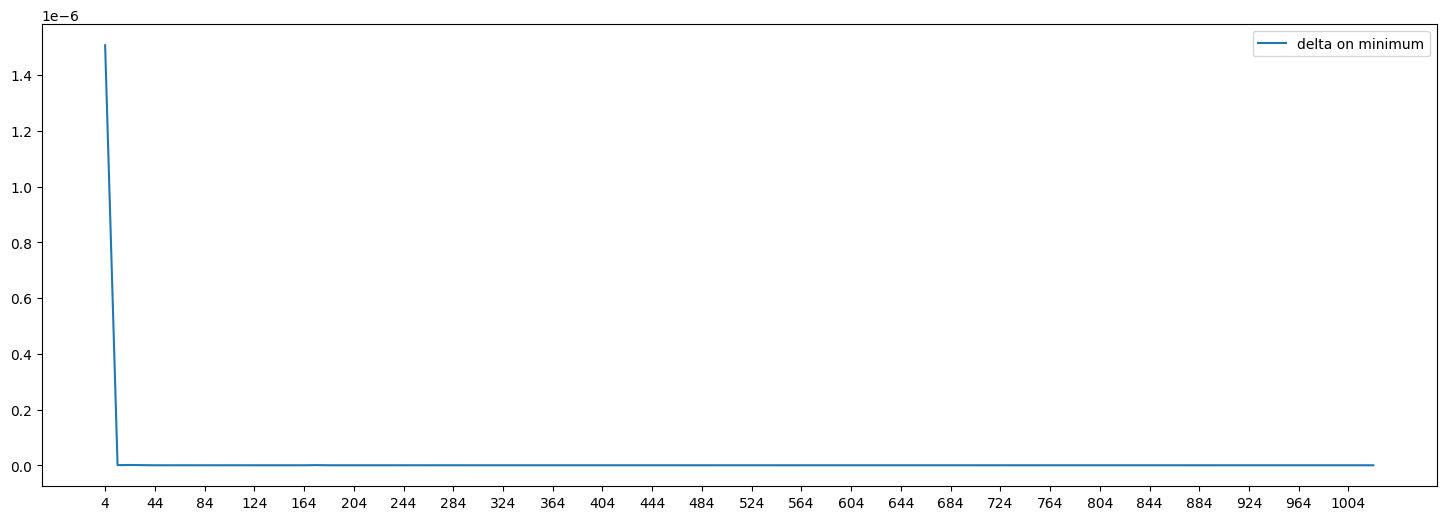

In [190]:

plt.figure(figsize=figsize)
plt.xticks(ticks=b_k)

plt.plot(mean_df["delta_min_def"])
plt.legend(["delta on minimum"])
# mean_res.plot()

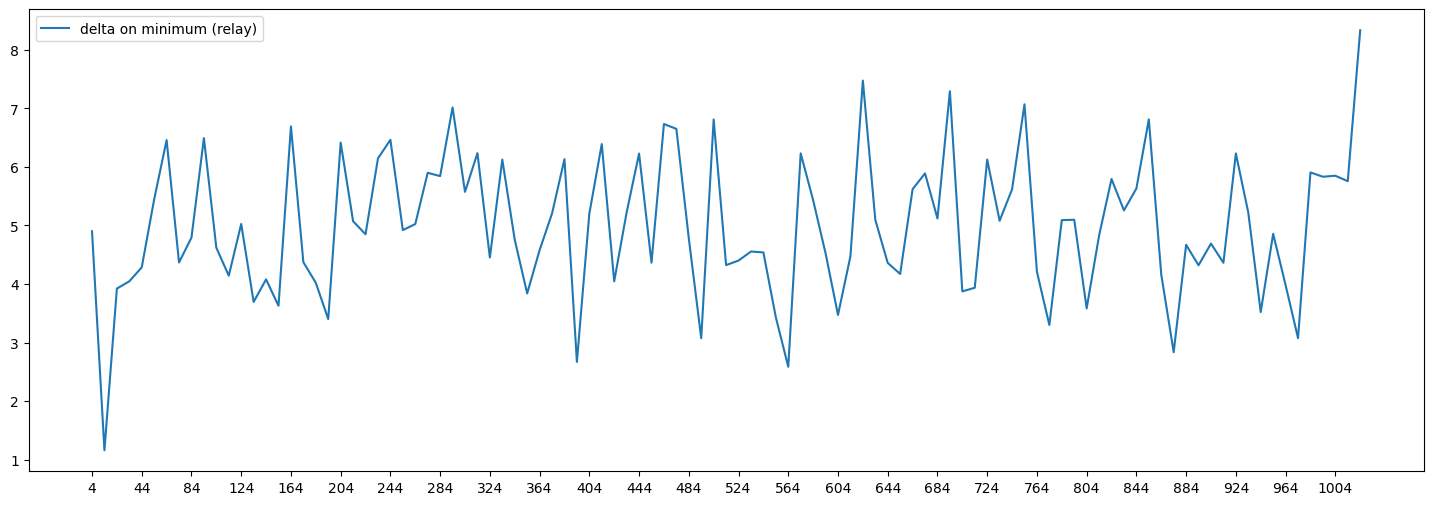

In [191]:

plt.figure(figsize=figsize)
plt.xticks(ticks=b_k)

plt.plot(mean_df["delta_min_rel"])
plt.legend(["delta on minimum (relay)"])
# mean_res.plot()

6.524730102874798e-07


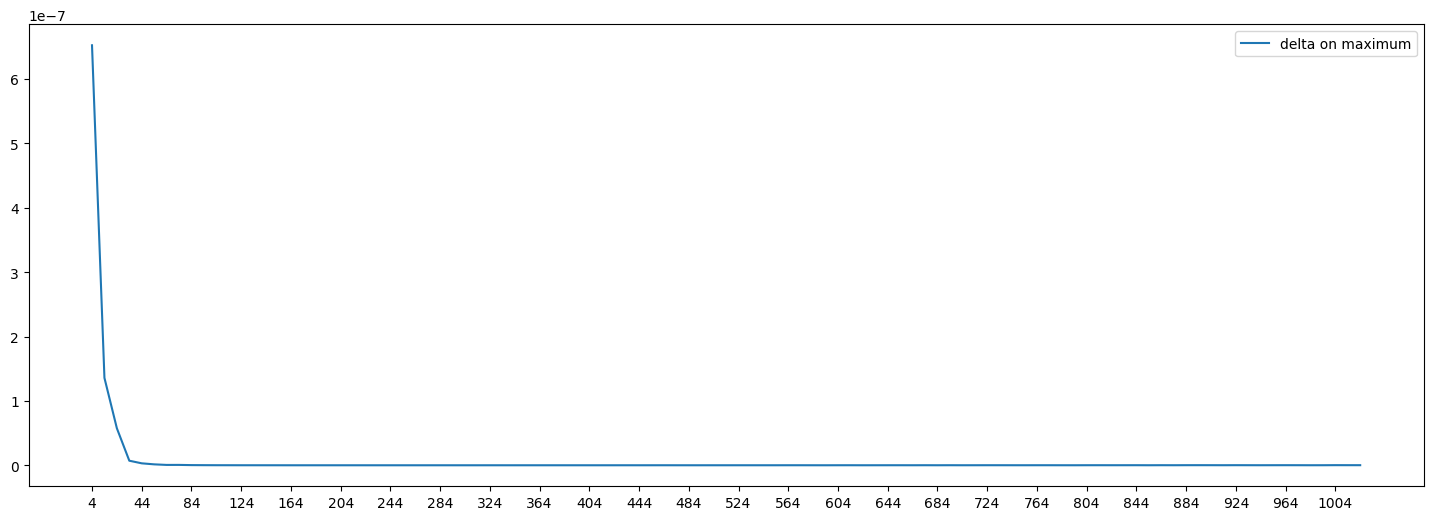

In [192]:
print(max(mean_df['delta_max']))
plt.figure(figsize=figsize)
plt.xticks(ticks=b_k)
plt.plot(mean_df["delta_max"])
plt.legend(["delta on maximum"])

<Figure size 1800x600 with 0 Axes>

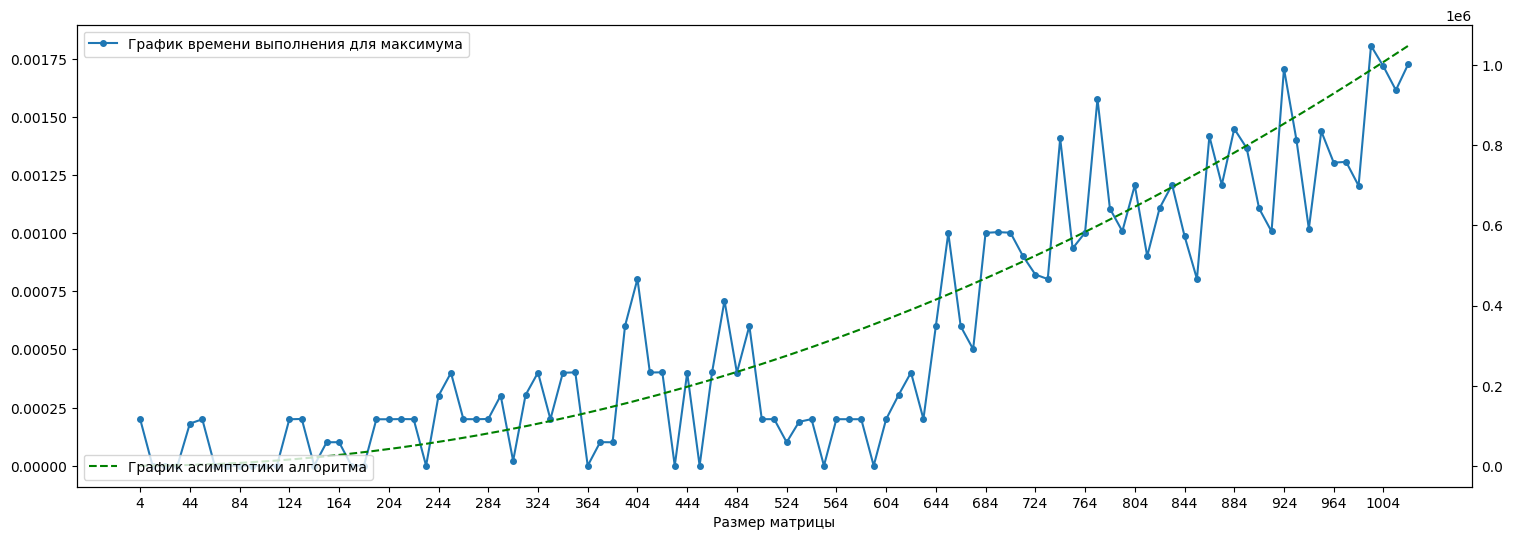

In [193]:
plt.figure(figsize=figsize)

fig, ax1 = plt.subplots(figsize=figsize)

ax1.plot(mean_df['value_max_time'],  marker='o',  markersize=4, label='График времени выполнения для максимума')
ax1.set_xlabel('Размер матрицы')
ax1.set_xticks(b_k)

ax2 = ax1.twinx()

ax2.plot(x_lt, x_lt ** 2, color='green', linestyle='--', label='График асимптотики алгоритма')

ax1.legend(loc='upper left')
ax2.legend(loc='lower left')

plt.show()
# plt.xticks(ticks=x)
# plt.legend(["time for calculation of maximum"])


<Figure size 1800x600 with 0 Axes>

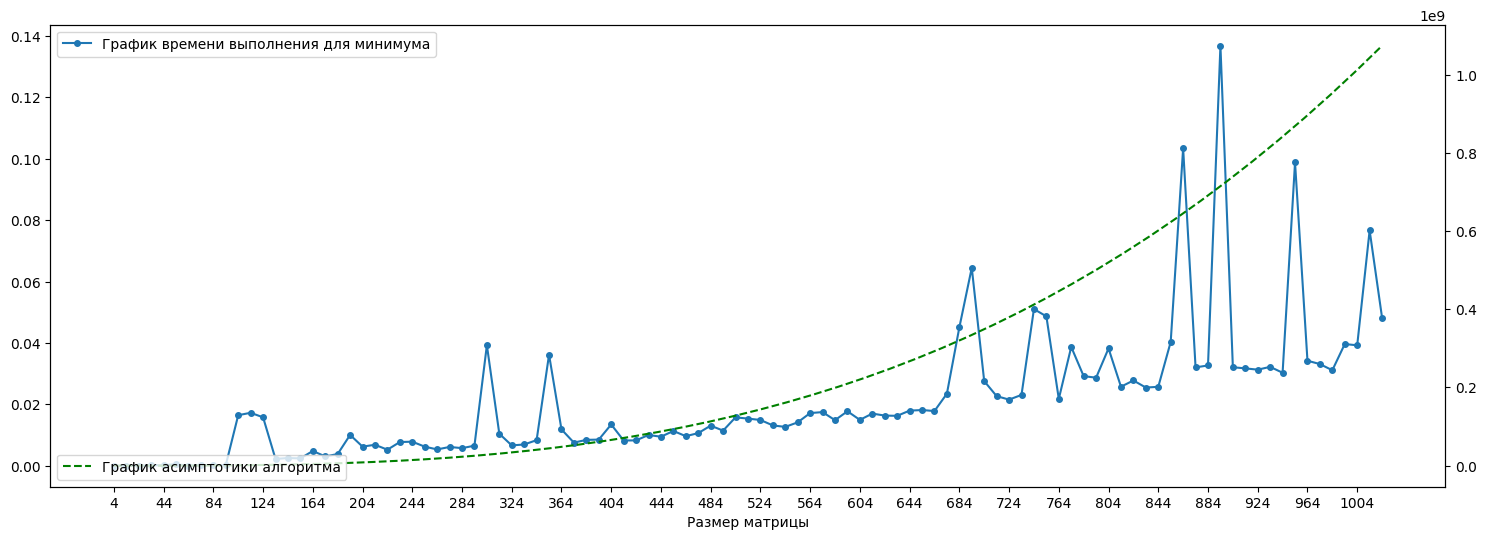

In [194]:
plt.figure(figsize=figsize)

fig, ax1 = plt.subplots(figsize=figsize)

ax1.plot(mean_df['value_min_def_time'],  marker='o',  markersize=4, label='График времени выполнения для минимума')
ax1.set_xlabel('Размер матрицы')
ax1.set_xticks(b_k)

ax2 = ax1.twinx()

ax2.plot(x_lt, x_lt ** 3, color='green', linestyle='--', label='График асимптотики алгоритма')

ax1.legend(loc='upper left')
ax2.legend(loc='lower left')
# plt.plot(x=x, y=x**2)
# plt.legend(["time for calculation of minimum"])
plt.show()

<Figure size 1800x600 with 0 Axes>

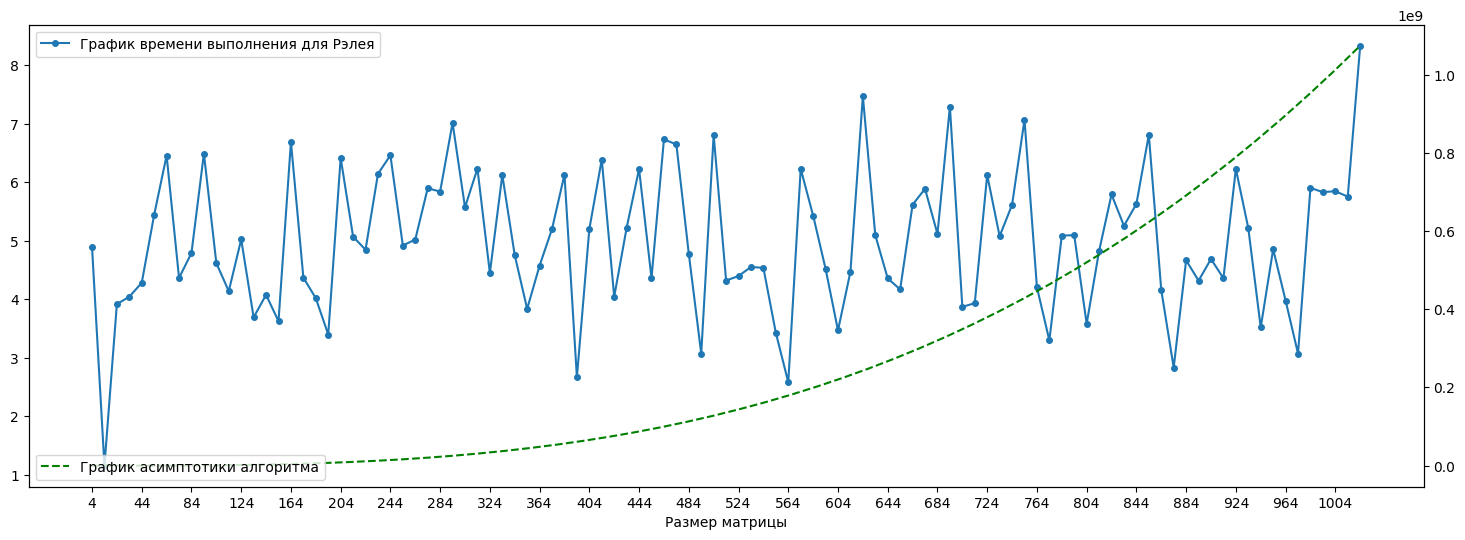

In [197]:
plt.figure(figsize=figsize)

fig, ax1 = plt.subplots(figsize=figsize)

ax1.plot(mean_df['delta_min_rel'],  marker='o',  markersize=4, label='График времени выполнения для Рэлея')
ax1.set_xlabel('Размер матрицы')
ax1.set_xticks(b_k)

ax2 = ax1.twinx()

ax2.plot(x_lt, x_lt ** 3, color='green', linestyle='--', label='График асимптотики алгоритма')

ax1.legend(loc='upper left')
ax2.legend(loc='lower left')
# plt.plot(x=x, y=x**2)
# plt.legend(["time for calculation of minimum"])
plt.show()

In [195]:
# df.to_csv("data/df.csv")
# mean_df.to_csv("data/mean_df.csv")
# res_df.to_csv("data/res_df.csv")